'''Documentation journey:

1. what made the importing tensorflow_io as tfio work (solution): 
Find a compatable version for tensorflow 
https://blog.csdn.net/weixin_50679163/article/details/124540848
for tensorflow==2.4.1, it was tensorflow==0.17.1

2. What I did to fix the NotImplementedError: libtensorflow_io.so is not found in ops path:

.......Restart and redownload anaconda and redo the whole process and yeah........

Maybe next time try to reinstall python again? - Nick

3. For the AttributeError: 

AttributeError                            Traceback (most recent call last)
~\AppData\Local\Temp\ipykernel_17836\3140991887.py in <module>
----> 1 audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

AttributeError: module 'tensorflow.keras.utils' has no attribute 'timeseries_dataset_from_array'

In the line of code: audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

Solution: use tf.keras.preprocessing.timeseries_dataset_from_array instead because it indicates that the timeseries_dataset_from_array function is not available in the tensorflow.keras.utils module. 
This is likely due to the fact that TensorFlow does not provide this specific function in the tensorflow.keras.utils module.
The timeseries_dataset_from_array function from the tf.keras.preprocessing module in TensorFlow.
'''

'''
Change the code a bit or placement of it to make it look different but still the same
'''

# Importing libraries

In [1]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

# Defining the paths towards our audio files. 

The Capuchin bird files contains capuchin audios for training, the Non Capuchin bird files are used to train. 
The data will be trained so the model can understand what is a capuchin bird sound and what isn't. 
I assume the Forest audios are the ones that will be used to test. We ideally want to parse through the audio and count how many cpauchin birds we want to hear. 

In the bottom code we are finding the path towards some clip examples of capuchin files and non capuchin files. 

In [2]:
CF = os.path.join('data', 'Parsed_Capuchinbird_Clips', 'XC3776-3.wav')
NCF = os.path.join('data', 'Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav')

Adapted from the data loading function from the TF documentation 

Function steps:
1. first we're converting the file name provided in the function and get a byte encoded string from decoding the wav file. 
2. When decoding the wav, we want mono audio (easier to process) from passing in the byte encoded string previously. What we get is a actual wav file with mono audio and a sample_rate.
3. We squeeze the wav file to get rid of the trailing axis i.e. shape = (132300, 1)
4. We cast our sample rate into a 64 byte integer. 
    a. Squeezing and casting the sample rate and wav helps us convert it into a format we can resample it into a 16 hertz file. 
5. The wav file is then converted from the sample rate hertz (44100 hertz which was earned when we decoded the wav and it gets put into sample_rate) to 16000 hertz and 132300 values to 48000 values.  

In [3]:
def load_wav_16k_mono(file):
    fc = tf.io.read_file(file)
    wav, sample_rate = tf.audio.decode_wav(fc, desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

# Implement method for wave and nwave

In [4]:
wave = load_wav_16k_mono(CF)
nwave = load_wav_16k_mono(NCF)

# Visual Waves after conversion

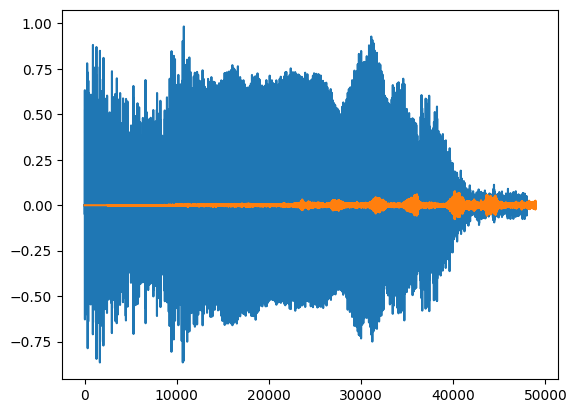

In [5]:
plt.plot(wave) #blue scale
plt.plot(nwave) #orange scale
plt.show()

# Creating Tensorflow Dataset for our deep learning model

In [6]:
POS = os.path.join('data', 'Parsed_Capuchinbird_Clips')
NEG = os.path.join('data', 'Parsed_Not_Capuchinbird_Clips')

# Loading the paths previously initiated into the tensorflow dataset format. 

File paths to look for clips and create paths. 

the list_files() function used below is going to give us a string set of files in a tensorflow data set format thats able to be preprocessed and loaded. 

Goes into the directories (POS or NEG) and looks for files of a specific format as listed (.wav) 

Returns a string that holds a path to a .wav file. 

In [7]:
pos = tf.data.Dataset.list_files(POS+'\*.wav')
neg = tf.data.Dataset.list_files(NEG+'\*.wav')

Here we are zipping up the positive and negative files and then combining both the files in one folder after labeling them. 

dataset.zip() allows you to concatenate two files together in line.

We are passing through the existing file paths but we are adding a 1 (tf.ones of the same shape) if its a positive sample or a 0 (tf.zeros of the same shape) if its negative. 

i.e. the original number of capuchin files within pos is 217, what tf.ones(len(pos)) does is return a tensorflow array with a size of 217 filled with 1s, incidicating these are all positive/capuchin files. 

Example: tf.ones(len(pos)) -->

<tf.Tensor: shape=(217,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>
       
tf.zeros(len(neg)) --> 
     
<tf.Tensor: shape=(593,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>
      
How the positive and negative files look after: positives.as_numpy_iterator().next() --> (b'data\\Parsed_Capuchinbird_Clips\\XC3776-4.wav', 1.0)

negatives.as_numpy_iterator().next() --> (b'data\\Parsed_Not_Capuchinbird_Clips\\crow-cawing-sound-effect-8.wav', 0.0)

Afterwards, we push the positives and negatives examples together in one variable to use to train the deep learning model. 
After concatenating the data, the shape of the data and the file format still remains the same. 

In [8]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg))))) 
#Error note: i had it tf.ones(len(neg)) before...is that why my code wasn't working before...
data = positives.concatenate(negatives)

# Determining the average length of a Capuchin call

When converting our audio into a spectrogram, we want to make sure to get the full length/majority of a Capuchin call when going through big/full length clips for good predictions. 

We are going to loop through every capuchin file and calculate how long it is. 

1. First we find the path towards the parsed capuchin bird clips
2. Use the previously made load_wav_16k_mono function to load the clips into its waveform and get it back. 
3. Finally analyze how long each waveform clip is and add it to the lengths array made in the beginning.
    a. Some clips will be more than 3 seconds long for example, some may be shorter, etc, so we want to ensure we captured the majority of the wave in the desired particular format of classification. 

Error: "WARNING:tensorflow:5 out of the last 5 calls to <function pfor.<locals>.f at 0x0000029097DF2E58> triggered tf.function retracing. "

ignore that error lol

In [9]:
lengths = []
for file in os.listdir(os.path.join('data', 'Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join('data', 'Parsed_Capuchinbird_Clips', file))
    lengths.append(len(tensor_wave))

# Now look at summary stats

Mean for values but 54156/16000 = mean length of a Capuchin clip is 3.38475.

In [10]:
tf.math.reduce_mean(lengths) 

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

Minimum for values. Shortest length is 2 seconds

In [11]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

Max for values. Maximum length is around 5 seconds. 

In [12]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

# Build preprocessing function for converting data into a Spectrogram

The bigger our Spectrogram, the more variables there will be to train, therefore it will take longer. 

The reason the function accounts for the file path AND the label i.e. (b'data\Parsed_Capuchinbird_Clips\XC3776-4.wav', 1.0), 

the b'data\Parsed_Capuchinbird_Clips\XC3776-4.wav' being the path and the label being 1.0. 

Steps of the function:
1. Load our data into it's wav form through the load_wav_16k_mono.
2. Grab the first 48000 steps or examples from each one of the signals.
3. Since some of the clips are less than 48000 in length, we will pad the rest of the clip. For instance if it doesn't add up to/is shorter than 48000, the rest will be 0s.
    a. By doing tf.zeros([48000] - tf.shape(wav)), it will give us the number of zeros we need to add at the start. 
4. After finding the amount of zeros we need, we're concating the zeros at the start and the wav file together.
5. tf.signal.stft() gives the short time fourier transform computation ("STFT is a fourier-related transform used to analyze  frequency and phase content of local sections of a signal as it changes over time" --> https://en.wikipedia.org/wiki/Short-time_Fourier_transform) through the wav contents (A tensor of real-valued signals estbalished before), the frame_length (The window length in samples), and frame_step (the number of samples to step. 
    a. For more information: https://www.tensorflow.org/api_docs/python/tf/signal/stft
6. Get rid of the negatives afterwards and make everything a absolute format. 
7. Encapsulate our spectrogram in another set of arrays to ensure we have it in the format we need when returning it for the deep learning model. 

In [13]:
def preprocess(fp, label):
    wav = load_wav_16k_mono(fp)
    wav = wav[:48000]
    zeropadding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zeropadding, wav], 0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

To show what the spectrogram looks like, we're going to grab a sample out of the positives data. 

What we get back is a file path and a label as this happens before the pre processing. Afterwards you iterate to the next files and repeat the process.  

After preprocessing the spectrogram with all file paths, you get a numpy array of different array data with the shape of 1491 pixles x 257 pixels and 1 channel. 

In [14]:
filep, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [15]:
spectrogram, label = preprocess(filep, label)

In [16]:
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[2.44760979e-02],
        [1.64286792e-02],
        [1.16858082e-02],
        ...,
        [3.25804431e-04],
        [1.19485521e-04],
        [7.82683492e-06]],

       [[1.69918314e-02],
        [1.71757732e-02],
        [1.83400400e-02],
        ...,
        [3.26101115e-04],
        [1.00970312e-04],
        [6.95856288e-05]],

       [[1.44632105e-02],
        [1.44600142e-02],
        [1.41877532e-02],
        ...,
        [4.51937085e-04],
        [1.11946676e-04],
        [3.82158905e-05]],

       ...,

       [[1.16975605e-02],
        [6.32021623e-03],
        [1.36298807e-02],
        ...,
        [3.95302224e-04],
        [1.81658237e-04],
        [2.65017152e-04]],

       [[8.48381966e-03],
        [1.17149092e-02],
        [1.78364292e-02],
        ...,
        [5.35128813e-04],
        [2.53080943e-04],
        [1.82010233e-04]],

       [[8.06572288e-03],
        [1.35248769e-02],
        [1.64394006e-02]

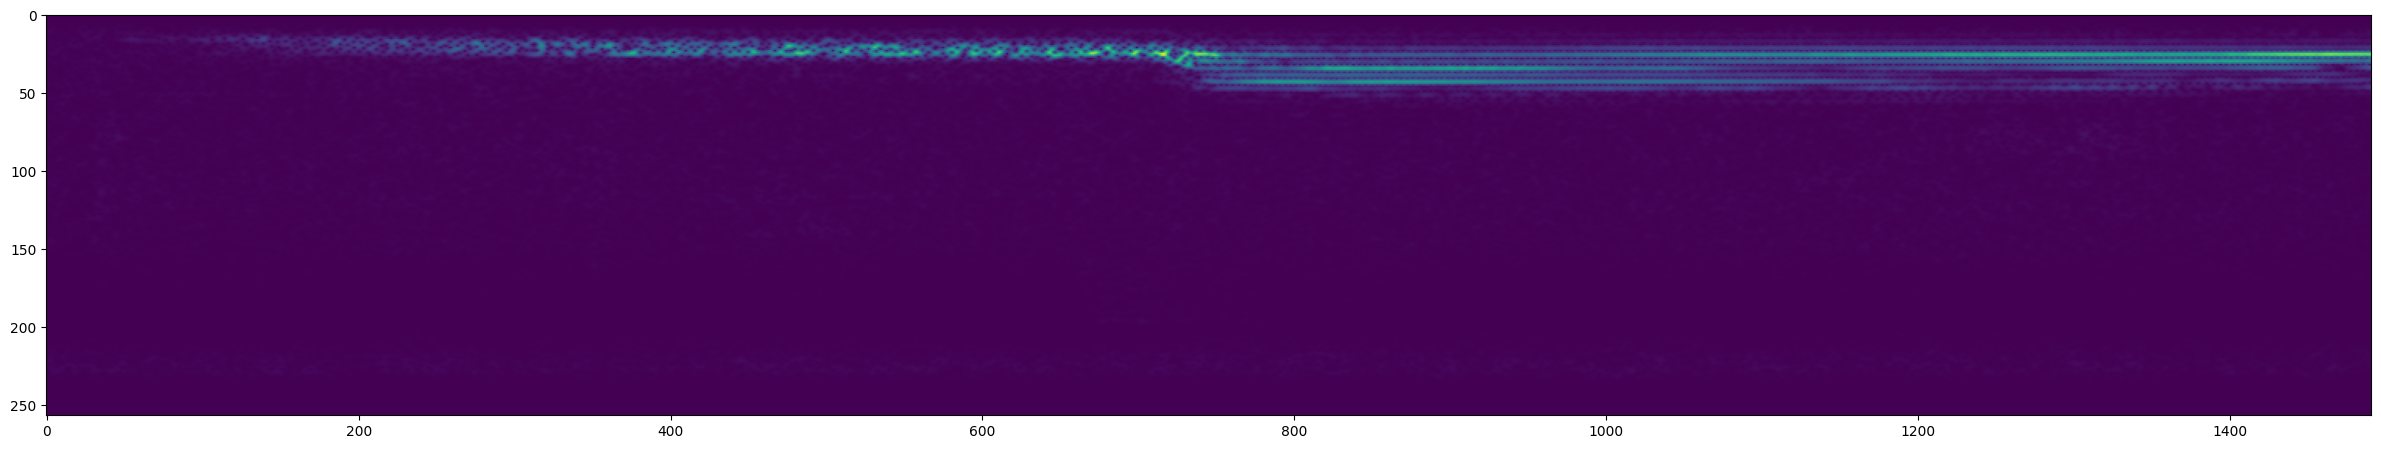

In [17]:
plt.figure(figsize=(30, 20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

# Creating Training and Testing data for model

In order to do this we need to finish off the tensorflow data pipeline. 

Since we have't ran the data pipelines into the spectrogram yet, we will do that now. The data pipeline is till in the format of path name and label. 

1. We will first preprocess our data files into a spectrogram.
2. Cache the data
3. Shuffle the data 
4. Batching - Train on 16 samples at a time
5. Prefetching - 8 so we can avoid any bottle necking within the cpu 

In [18]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

There are 51 files total within the data folder. The top 36 of the data will be designated to the training data, and test will be the rest of the 15 (skipping over the 36 already within train). 

In [19]:
train = data.take(36)
test = data.skip(36).take(15)

The samples.shape is (16, 1491, 257, 1) (16 different examples of our spectrogram which have the shape 1491 x 257 x 1)

This shape is specifically important since it will be passed through the input for the deep learning model later on. 

In [20]:
samples, labels = train.as_numpy_iterator().next()

In [21]:
samples.shape

(16, 1491, 257, 1)

# Building the DLM...Yay

Necessary dependencies from tensorflow

Specficially we are building a Sequential model hence the import
Importing the 3 layers so we can go from a convolutional layer to a dense layer. 

In [22]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, Dense, Flatten

1. Define sequential model by using a instance from the class. 
2. Adding a bunch of convolutional layers. 
3. Defining the Conv2D layer
    a. We want 16 different kernels with the shape of 3 x 3, not updating the stride (default), activation of a relu function aka a rectified linear unit (whatever that means), and then we want our input shape to match the samples.shape aka the spectrogram. 
4. Add another Conv2D layer almost identical 
5. Flattening the layer for the Dense layers later on.
    a. Taking the 3 dimensional convolutional outputs and we flatten it down to a single dimension.
6. We pass the currently flattened model/convolutional outputs to our dense layer. 
    a. 128 units, activation with relu
    b. From the previous layer, it takes the flattened 1D vector and performs a "standard feedforward operation" (whatever that is) for a output for the next layer. 
7. The output is then passed onto a final layer where the dense layer has one value (outputs 0 or 1) because of the activation sigmoid, which means it is often used for binary classification problems.

Questions to search for later: 

1. What are the differences between Convolutional layers and dense layers?

2. What is the difference between activation=relu and activation=sigmoid?

3. Look up what the parameters mean for convolutional and dense layers later. 

In [23]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(1491, 257, 1)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Compilation

In order to do so, we will be using the adam loss/adam optimizer with a binary crossentropy loss (since it is dealing with binary classification) and pass on some metrics including the recall metric and the precision metric from the tf.keras library.

This will help compile our model and give us a summary. 

Questions: 

1. What is tf.keras.metrics.Recall() and tf.keras.metrics.Precision()?
    a. In the code, they are both the evaluation metrics that the model keeps track of during training. 
    b. Recall() calculates/measures the ability of the model to correctly identify what it thinks are positive instances compared to all the real positive instances. This is known as recall/true positive rate. 
    c. Precision() computes the ratio of how many of the predicted positive instances are correct. The precision is defined by the true positive predictions to the total number of positive predictions made by the model. 

In [24]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1489, 255, 16)     160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1487, 253, 16)     2320      
_________________________________________________________________
flatten (Flatten)            (None, 6019376)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               770480256 
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 770,482,865
Trainable params: 770,482,865
Non-trainable params: 0
_________________________________________________________________


# Training the model (finally)

This code allows us to get the training values i.e. the loss metrics for our validation partition and the training part. We will also get our different metrics as well. 

Epochs is a indicator for how long/short you want to train the model (how many rounds you want to train it) in order for it to be accurate and based on whether youre overfitting or not. 

The validation part for the training partition will be the test data from before. Any variable during your training i.e. val_loss or val_recall or val_precision is part of validating the data from the test files, and they are used to measure the Recall and Preciison (? I assume). 
'
Ideally what you want to see is the loss decrease and recall/precision increase over time. 

After training the model and getting the stats, you will get a graph for the loss, precision, and recall.  

In [26]:
hist = model.fit(train, epochs=4, validation_data=test)

Epoch 1/4
36/36 [==============================] - 131s 4s/step - loss: 6.7439 - recall: 0.8140 - precision: 0.7548 - val_loss: 0.1025 - val_recall: 0.8209 - val_precision: 1.0000
Epoch 2/4
36/36 [==============================] - 127s 4s/step - loss: 0.0643 - recall: 0.8845 - precision: 0.9961 - val_loss: 3.2707e-04 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 3/4
36/36 [==============================] - 128s 4s/step - loss: 0.0139 - recall: 0.9964 - precision: 0.9884 - val_loss: 0.0039 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 4/4
36/36 [==============================] - 129s 4s/step - loss: 0.0187 - recall: 0.9973 - precision: 0.9888 - val_loss: 0.0115 - val_recall: 0.9836 - val_precision: 1.0000


In [27]:
hist.history

{'loss': [3.3030526638031006,
  0.040425386279821396,
  0.01317339763045311,
  0.015340091660618782],
 'recall': [0.882758617401123,
  0.9466666579246521,
  0.9874213933944702,
  0.9937888383865356],
 'precision': [0.8590604066848755,
  0.9930070042610168,
  0.9936708807945251,
  0.9937888383865356],
 'val_loss': [0.10251721739768982,
  0.00032707396894693375,
  0.003850226290524006,
  0.011546329595148563],
 'val_recall': [0.8208954930305481, 1.0, 1.0, 0.9836065769195557],
 'val_precision': [1.0, 1.0, 1.0, 1.0]}

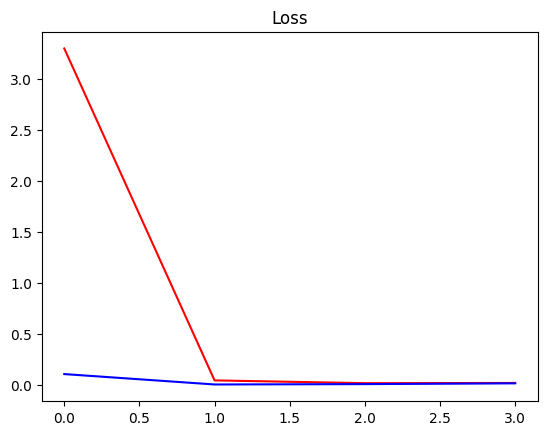

In [28]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

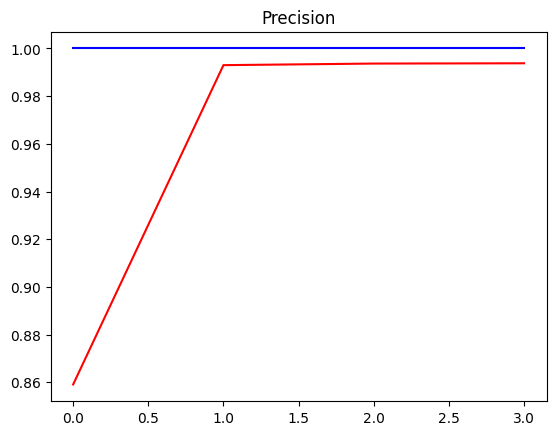

In [29]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

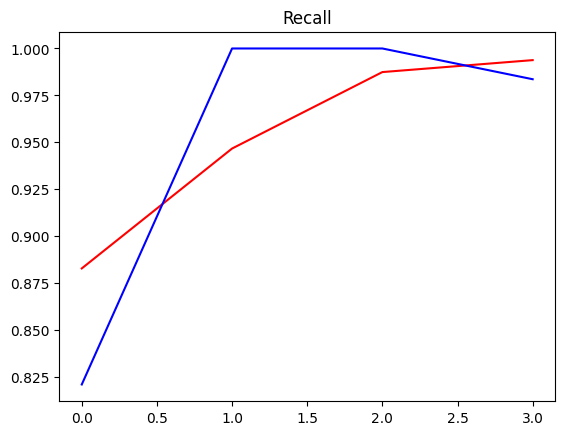

In [30]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

# Test/Make a prediction based on a single clip

We're going to grab one batch and make a prediction based on it.

What we will grab out of this is the spectrogram, and the labels. 

Steps:
1. x_test should have 16 spectrograms (1 for every capuchin bird clips) and y test should have 16 labels. (You can confirm this by doing x_test.shape and y_test.shape to confirm the size)

2. model.predict() allows you to pass through audio clips to the DL model and make predictions and return a array with prediction data.
    a. The results that the predictions think is a capuchin clip have a 1.00+00 on it. 
3. Now that we have the results, we can convert the array of results (logits) to classes by looping through each one of the predictions and classify it.
    a. If a prediction is above 0.5 (i.e. result > 0.5) it will turn into a 1 and be put back in the array, otherwise it will replace it with 0. 

In [31]:
x_test, y_test = test.as_numpy_iterator().next()

In [32]:
yhat = model.predict(x_test)

In [33]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

In [34]:
y_test

array([0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.],
      dtype=float32)

In [35]:
yhat

[0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1]

# Building Forest Parsing functions

What we are first going to do is load the mp3 files using the load_mp3_16k_mono function. It is similar to the load_wav_16k_mono function but with mp3 now, so we need to use some different functions. 

Steps:
1. Instead of the tfio.loadwave function we will use the tfio.audio.audioIOTensor function because the mp3 files are multi-channeled each. 
    a. This way it ensures that the multi channels are 
2. Instead of dropping one channel we will take that tensor and add them together and divided it by 2 to help take the average between the two different channels as it helps reduce it to a single channel value. 

The rest of the function will be the same as what was happening during the load_wav_16k_mono function from before. 

In [36]:
def load_mp3_16k_mono(fn):
    res = tfio.audio.AudioIOTensor(fn)
    tensor = res.to_tensor() #convert to tensor and combine channels 
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2
    sr = res.rate
    sr = tf.cast(sr, dtype=tf.int64)
    wav = tfio.audio.resample(tensor, rate_in=sr, rate_out=16000)
    return wav

In [37]:
mp3 = os.path.join('data', 'Forest Recordings', 'recording_00.mp3')

Next we're going to grab one recording (the first one from the forest recordings folder, load it with the function, and then convert the wav file into a number of same size audio slices to pass for our model. This means multiple predictions are going to happen on a single clip.

We input the wav file initially but do it a second time since it parses through the input and the target. 
We want our sequences to be 48000 samples. 
By having the sequence stride equal to the sequence length there will be no overlap and there's only going to be one batch from this.  

After slicing the clip, there should be 60 windows from one clip.We;re going to take the 60 windows and convert them to spectrograms and loop through them all to make predictions.  

In [38]:
wav = load_mp3_16k_mono(mp3)

In [39]:
audioslices = tf.keras.preprocessing.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [41]:
samples, index = audioslices.as_numpy_iterator().next()

In [45]:
samples.shape

(1, 48000)

Same preprocess function as before with the wav files but this time we will be squeezing the dimensions since the audio clips have a channel at the start. 

After slicing the audio into spectrograms we will put the predictions on the audio slices. 

In [46]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zeropadding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zeropadding, sample], 0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

In [51]:
audioslices = tf.keras.preprocessing.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
audioslices = audioslices.map(preprocess_mp3)
audioslices = audioslices.batch(64)

Just like for the wav files, we're going to do the prediction for the model. This time, we will replace it with a 1 if its over 0.99 to increase the confidence of our model. This way we're only going to take the most confident predictions as being valid call detection. 

In [62]:
yhat = model.predict(audioslices)
yhat = [1 if prediction > 0.99 else 0 for prediction in yhat]

After seeing the predictions from the audio slices, what you notice it is doing is classifying consecutive calls as additional predictions. 
In order to fix this, we need to reduce this sos the consecutive calls are treated as a single one. We can do this using the group by method from the itertools library. 

In [64]:
from itertools import groupby

After importing the itertools, we are going to loop through the predictions from yhat and reduce the sum. We want to get the number of calls per forest recording.


In [67]:
yhat = [key for key, group in groupby(yhat)]

In [71]:
calls = tf.math.reduce_sum(yhat).numpy()

In [72]:
calls

5

Now we need to loop through every single file within the Forest Recordings directory. 

this is similar to when we calculated the call length.

Steps:
1. We loop through every recording in the directory.
2. For each one we load it to the mp3_16k_mono function to get a wav.
3. Then convert it into audio slices.
4. Then we perform the audio preprocessing to turn it into a spectrogram. 
5. Batch the audio slices up
6. Make predictions on it with the model. 

In [73]:
results = {}
for file in os.listdir(os.path.join('data', 'Forest Recordings')):
    FILEPATH = os.path.join('data', 'Forest Recordings', file)
    wav = load_mp3_16k_mono(FILEPATH)
    audioslices = tf.keras.preprocessing.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audioslices = audioslices.map(preprocess_mp3)
    audioslices = audioslices.batch(64)
    
    yhat = model.predict(audioslices)
    results[file] = yhat

In [74]:
results

{'recording_00.mp3': array([[5.8746636e-03],
        [9.6920133e-03],
        [9.6017718e-03],
        [9.9025112e-01],
        [1.0000000e+00],
        [1.2133420e-03],
        [2.0166934e-03],
        [8.8530779e-03],
        [9.0606213e-03],
        [8.5007250e-03],
        [4.3221116e-03],
        [8.6757541e-03],
        [3.5810769e-03],
        [9.9999881e-01],
        [1.0000000e+00],
        [2.0519793e-03],
        [1.6002170e-06],
        [7.2470009e-03],
        [9.6179545e-03],
        [1.1117071e-02],
        [1.2528598e-02],
        [5.1451027e-03],
        [3.0654877e-02],
        [9.9229527e-01],
        [1.0000000e+00],
        [7.0855043e-05],
        [7.1543455e-04],
        [6.4910650e-03],
        [1.0371536e-02],
        [1.3217837e-02],
        [3.3527315e-03],
        [7.7281296e-03],
        [2.5311708e-03],
        [4.5351029e-05],
        [1.2088984e-02],
        [2.8078020e-02],
        [1.0000000e+00],
        [2.4454892e-03],
        [9.3113184e-03],
     

Afterwards, we convert all predictions into classes and use the threshold. 

What the code is doing is looping through every results inside of the results dictionary and convert them into class predictions aka binary predictions instead of the previous individual percentage. 

In [75]:
classpreds = {}
for file, logits in results.items():
    classpreds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
classpreds

{'recording_00.mp3': [0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_01.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_02.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_03.mp3': [0,
  0,
  0,
  

Now we're going to convert these into grouped consecutive detections. 

In [78]:
postprocessed = {}
for file, scores in classpreds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

{'recording_00.mp3': 5,
 'recording_01.mp3': 0,
 'recording_02.mp3': 0,
 'recording_03.mp3': 0,
 'recording_04.mp3': 4,
 'recording_05.mp3': 0,
 'recording_06.mp3': 5,
 'recording_07.mp3': 2,
 'recording_08.mp3': 24,
 'recording_09.mp3': 0,
 'recording_10.mp3': 5,
 'recording_11.mp3': 4,
 'recording_12.mp3': 0,
 'recording_13.mp3': 0,
 'recording_14.mp3': 0,
 'recording_15.mp3': 2,
 'recording_16.mp3': 6,
 'recording_17.mp3': 4,
 'recording_18.mp3': 6,
 'recording_19.mp3': 0,
 'recording_20.mp3': 0,
 'recording_21.mp3': 1,
 'recording_22.mp3': 2,
 'recording_23.mp3': 6,
 'recording_24.mp3': 0,
 'recording_25.mp3': 2,
 'recording_26.mp3': 2,
 'recording_27.mp3': 0,
 'recording_28.mp3': 1,
 'recording_29.mp3': 13,
 'recording_30.mp3': 3,
 'recording_31.mp3': 1,
 'recording_32.mp3': 2,
 'recording_33.mp3': 0,
 'recording_34.mp3': 4,
 'recording_35.mp3': 0,
 'recording_36.mp3': 1,
 'recording_37.mp3': 3,
 'recording_38.mp3': 2,
 'recording_39.mp3': 2,
 'recording_40.mp3': 1,
 'recording_41

# Export it to a csv file

In [79]:
import csv

Steps:
1. We open a new file we want to write in aka capuchinbirdresults.csv, w for write, and make a new line every time.
2. define csv.writer and we're going to be parsing through the file and delimit with a comma. 
3. We will then write out the title of the csv file.
4. Loop through the postprocessed file and get the key (string of the recording name) and value associated with it.
5. We use writer.writerow to write out the key and the associated value. 

In [80]:
with open('capuchinbirdresults.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])